# Сборный проект

В последнее время всё больше появляется платформ для игр, также популярность набирают игры на мобильные телефоны, за счет этого конкуренция на рынке растет. И перед нами стоит задача определиться, какой же продукт наиболее популярен среди пользователей, чтобы составить план рекламной компании. Данное исследование проводится для интернет-магазина "Стримчик".

Цель: выявить наиболее перспективные игровые платформы, определиться с портретами пользователей для планирования рекламной кампании на 2017 год и оценить, какие факторы могут влиять на популярность игр среди пользователей.

Описание данных: Данные получены их открытых источников.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

Ход исследования:
* Шаг 1. Откройте файл с данными и изучите общую информацию
* Шаг 2. Подготовьте данные
* Шаг 3. Проведите исследовательский анализ данных
* Шаг 4. Составьте портрет пользователя каждого региона
* Шаг 5. Напишите общий вывод

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')
from scipy import stats as st
%matplotlib inline

test_mode = False # если нужно пропустить построение графиков, не влияющий на датафрейм

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 100)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
# Два знака после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') # C:\Users\msit\Desktop\data science)
except:
    data = pd.read_csv(r'\Users\msit\Desktop\data science\datasets\games.csv') #, sep='\t')
print(data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii          2006.00        Sports     41.36   
1         Super Mario Bros.      NES          1985.00      Platform     29.08   
2            Mario Kart Wii      Wii          2008.00        Racing     15.68   
3         Wii Sports Resort      Wii          2009.00        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB          1996.00  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45         76.00          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29         82.00        8.3      E  
3     10.93      3.28         2.95         80.00          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
#Посмотрим краткую информацию датафрейма:
display('Размер датайрейма: {}'.format(data.shape))
display(data.head())
display(data.tail())
display(data.describe())
start_info = data.info()
display(start_info)

'Размер датайрейма: (16715, 11)'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('Пропусков в данных {} - {}%'.format(col, round(pct_missing*100)))

Пропусков в данных Name - 0%
Пропусков в данных Platform - 0%
Пропусков в данных Year_of_Release - 2%
Пропусков в данных Genre - 0%
Пропусков в данных NA_sales - 0%
Пропусков в данных EU_sales - 0%
Пропусков в данных JP_sales - 0%
Пропусков в данных Other_sales - 0%
Пропусков в данных Critic_Score - 51%
Пропусков в данных User_Score - 40%
Пропусков в данных Rating - 40%


<div class="alert alert-info">     
<b>Шаг 1 выполнен. </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Файл открыт, изучена общая информация. В таблице 16715 строк, 11 столбцов. Дубликатов нет, присутствуют пропуски данных в 6 столбцах. Критичными являются пропуски в столбцах "Critic_Score", "User_Score", "Rating".

# Шаг 2. Подготовьте данные
-	Замените названия столбцов (приведите к нижнему регистру);
-	Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
-	Обработайте пропуски при необходимости: 
-	Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
-	Опишите причины, которые могли привести к пропускам;
-	Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
-	Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-info">     
<b>2.1. Замените названия столбцов (приведите к нижнему регистру)</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Сделано

In [8]:
data.dtypes # посмотрим на типы данных

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-info">
<br /> 
    <font size="3", color = "black">Числовые данные в столбце user_score должны остаться числовыми. Что логично. Но мешает nan и tbd, то есть пропущенные значения и аббревиатура tbd (которая расшифровывается как to be determinate - оценка не определена. Может быть, эти игры вышли недавно, еще недостаточное количество данных, а, может быть, данные об оценки пользователей просто отсутствуют ввиду непопулярности или давней даты выпуска).
        
- изменить  в user_score tbd на NaN. Ни там, ни там не сможем заменить на ноль. После чего переведем user_score в тип float

- В годах у нас 269 пропусков, посмотрим, можно ли их удалить или заменить на что-то еще. 
        
- изменить тип данных на числовой в year_of_release и critic_score. Года и оценки критиков - целые числа.
        

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [11]:
data = data.drop_duplicates().reset_index(drop=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [12]:
data['name'].describe() 

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [13]:
data['year_of_release'].describe() 

count   16446.00
mean     2006.48
std         5.88
min      1980.00
25%      2003.00
50%      2007.00
75%      2010.00
max      2016.00
Name: year_of_release, dtype: float64

In [14]:
year_date = data.query('year_of_release.isna()')
year_date

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.50,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.40,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.50,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.70,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
name_date = data.query('name.isna()')
name_date

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
genre_date = data.query('genre.isna()')
genre_date

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-info">
<br /> 
    <font size="3", color = "black">Для аналитики не нужны игры без года создания, т.к. данные не могут быть актуальными на выбранный позднее период. Тем более, что таких данных 2 процента. Особой роли не сыграет.         
        Пропуски в данных имени и жанра в одних и тех же строках. Эти строки тоже можно безболезненно удалить.
        

In [17]:
data_new = data.loc[~(data['year_of_release'].isna())]
data_new = data_new.loc[~(data['name'].isna())]

In [18]:
# data_new['sm_price'] = data_new['sm_price'].astype(int)
data_new['year_of_release'] = data_new['year_of_release'].astype(int)

In [19]:
data_new.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [20]:
data_new.shape[0] / data.shape[0]

0.9837870176488184

<div class="alert alert-info">
<br /> 
    <font size="3", color = "black">У нас еще остались столбцы critic_score и user_score с большими пропусками. Их безболезненно удалить или заменить на ноль мы не можем (я попыталась, получилось  смещение, показатели min и median  равны тому, на что пропуски заменяем). Соответственно, оставлю пропуски в данных так, как есть, чтобы не портить общую картину.

In [21]:
data_new.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<div class="alert alert-info">
<br /> 
    <font size="3", color = "black">Восстановление рейтинга ESRB. Определим самую популярную оценку для жанра и составим словарь.

In [22]:
genre_list = data_new['genre'].unique()
genre_dict = {}
for genre in genre_list:
    print('Популярные оценки для жанра ', genre)
    rating_value_counts = data_new[data_new['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts)
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

Популярные оценки для жанра  Sports
E       1162
T        195
E10+     105
M         16
Name: rating, dtype: int64
Популярные оценки для жанра  Platform
E       354
E10+    141
T        63
M         3
Name: rating, dtype: int64
Популярные оценки для жанра  Racing
E       576
T       167
E10+     95
M        18
Name: rating, dtype: int64
Популярные оценки для жанра  Role-Playing
T       415
M       161
E10+    111
E        83
Name: rating, dtype: int64
Популярные оценки для жанра  Puzzle
E       284
E10+     42
T        10
Name: rating, dtype: int64
Популярные оценки для жанра  Misc
E       449
T       228
E10+    166
M        13
EC        5
K-A       1
Name: rating, dtype: int64
Популярные оценки для жанра  Shooter
M       553
T       340
E10+     56
E        47
Name: rating, dtype: int64
Популярные оценки для жанра  Simulation
E       321
T       186
E10+     47
M         5
Name: rating, dtype: int64
Популярные оценки для жанра  Action
T       670
M       596
E10+    468
E       410
A

{'Sports': 'E',
 'Platform': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Puzzle': 'E',
 'Misc': 'E',
 'Shooter': 'M',
 'Simulation': 'E',
 'Action': 'T',
 'Fighting': 'T',
 'Adventure': 'E',
 'Strategy': 'T'}

In [23]:
data_new['rating'] = data_new['rating'].fillna('NR')

def fill_rating(row):
    if row[10] == 'NR':
        row[10] = genre_dict[row[3]]
    return row

data_new = data_new.apply(fill_rating, axis=1)

In [24]:
data_new['rating'].unique()

array(['E', 'T', 'M', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-info">     
 </b></font>
    <br /> 
    <font size="3", color = "black">
- Совет по рейтингам развлекательного программного обеспечения ( ESRB ) — это североамериканская система рейтингов видеоигр, которая используется в США, Канаде и Мексике (только в цифровом формате). Он был создан 1 сентября 1994 года после слушаний в Сенате о насилии в видеоиграх.

- Рейтинговая система ESRB состоит из 5 рейтингов. E, E10+, T, M и AO. Раньше существовал шестой рейтинг EC, но он был прекращен 1 марта 2018 года (то есть на момент создания датасета действовал и должен быть учтен). Раньше существовал и седьмой рейтинг K-A, но он был прекращен 1 января 1998 года.

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.

- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

- В столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл (первоначально "K-A" ("Kids to Adults"), потом было переименовано на E10+), поэтому предлагаю переименовать 'K-A' в 'E10+' для удобного и более точного анализа в дальнейшем.

In [25]:
kids_to_adults = ['E10+', 'K-A']
for hh in kids_to_adults:
    data_new['rating'] = data_new['rating'].replace('K-A', 'E10+')
data_new['rating'].value_counts()

E       7679
T       5523
M       1836
E10+    1396
EC         8
AO         1
RP         1
Name: rating, dtype: int64

In [26]:
# Функция для замены значения аббревиатур на полное название бля понимание, что это за игровая платформа.
def replace_wrong_platforms(wrong_platforms, correct_platform):
    data_new['platform'] = data_new['platform'].replace(wrong_platforms, correct_platform)
replace_wrong_platforms('2600', 'Atari 2600')
replace_wrong_platforms('Wii', 'Nintendo Wii')
replace_wrong_platforms('NES', 'Nintendo NES')
replace_wrong_platforms('GB', 'GB-60')
replace_wrong_platforms('DS', 'Nintendo DS')
replace_wrong_platforms('X360', 'Xbox 360')
replace_wrong_platforms('SNES', 'Nintendo SNES')
replace_wrong_platforms('GBA', 'Game Boy Advance')
replace_wrong_platforms('3DS', 'Nintendo 3DS')
replace_wrong_platforms('N64', 'Nintendo 64')
replace_wrong_platforms('XB', 'Xbox')
replace_wrong_platforms('XOne', 'Xbox One')
replace_wrong_platforms('WiiU', 'Nintendo Wii U')
replace_wrong_platforms('GC', 'Nintendo GameCube')
replace_wrong_platforms('GEN', 'SEGA Retro Genesis')
replace_wrong_platforms('DC', 'Dendy Classic')
replace_wrong_platforms('PSV', 'PS Vita')
replace_wrong_platforms('SAT', 'Sega Saturn')
replace_wrong_platforms('WS', 'WonderSwan')
replace_wrong_platforms('TG16', 'NEC TurboGrafx')
replace_wrong_platforms('3DO', 'Panasonic 3DO')
replace_wrong_platforms('GG', 'Game Gear')
replace_wrong_platforms('PCFX', 'NEC PC-FX')
# проверяем уникальные значения в столбце
display(data_new['platform'].unique())

array(['Nintendo Wii', 'Nintendo NES', 'GB-60', 'Nintendo DS', 'Xbox 360',
       'PS3', 'PS2', 'Nintendo SNES', 'Game Boy Advance', 'PS4',
       'Nintendo 3DS', 'Nintendo 64', 'PS', 'Xbox', 'PC', 'Atari 2600',
       'PSP', 'Xbox One', 'Nintendo Wii U', 'Nintendo GameCube',
       'SEGA Retro Genesis', 'Dendy Classic', 'PS Vita', 'Sega Saturn',
       'SCD', 'WonderSwan', 'NG', 'NEC TurboGrafx', 'Panasonic 3DO',
       'Game Gear', 'NEC PC-FX'], dtype=object)

In [27]:
print(data_new.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


In [28]:
data_new.user_score.value_counts().to_frame()

,user_score
7.80,322
8.00,285
8.20,276
8.30,252
7.50,249
8.50,247
7.90,246
8.10,237
7.70,236
7.30,232


In [29]:
data_new.critic_score.value_counts().to_frame()

,critic_score
70.00,252
71.00,248
75.00,240
80.00,235
73.00,234
78.00,233
76.00,228
72.00,223
74.00,223
77.00,218


<div class="alert alert-info">     
<b> <font size="3", color = "black">Приведем оценки критиков и оценки пользователей к единому знаменателю

In [30]:
data_new['user_score'] = (data_new.loc[~data_new['user_score'].isna(), 'user_score'] * 10).round(0)
data_new.user_score.value_counts().to_frame()

,user_score
78.00,322
80.00,285
82.00,276
83.00,252
75.00,249
85.00,247
79.00,246
81.00,237
77.00,236
73.00,232


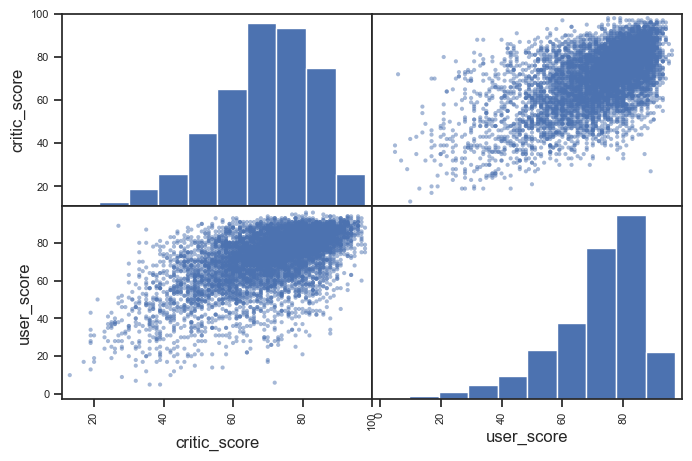

In [31]:
pd.plotting.scatter_matrix(data_new[['critic_score', 'user_score']], figsize=(8,5));

In [32]:
data_new['critic_score'].corr(data_new['user_score'])

0.5796706281932217

<div class="alert alert-info">     
    <br /> 
    <font size="3", color = "black">Распределения близкие к нормальному. Корреляция средне выраженная.
Поэтому пропуски в данных двух столбцах я оставлю.

In [33]:
data_new['sales_total'] = data_new['na_sales'] + data_new['eu_sales'] + data_new['jp_sales'] + data_new['other_sales']
# суммарные продажи во всех регионах

In [34]:
(
    data_new[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'sales_total']]
    .apply (['count', 'median', 'min', 'max'])  
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
count,16444.00,16444.00,16444.00,16444.00,16444.00,7983.00,7463.00,16444.00
median,2007.00,0.08,0.02,0.00,0.01,71.00,75.00,0.17
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
max,2016.00,41.36,28.96,10.22,10.57,98.00,97.00,82.54


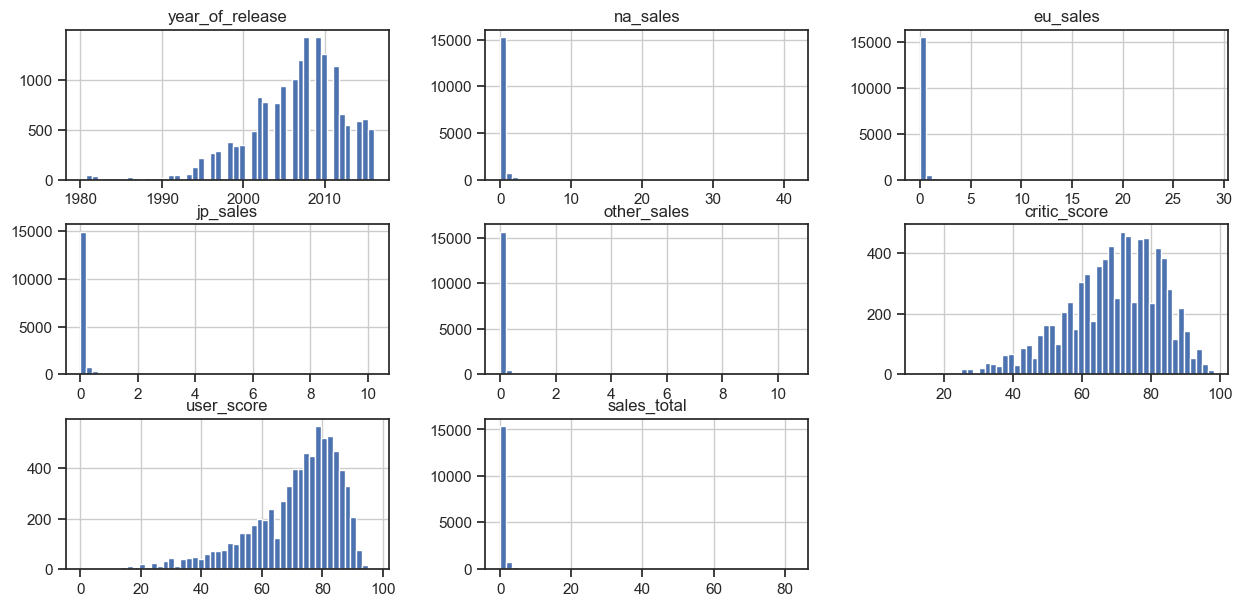

In [35]:
data_new.hist(bins=50, figsize=(15, 7));

<div class="alert alert-info">
<br /> 
    <font size="3", color = "black"> Часть 2 проекта завершена. 
  
- В столбцах name и genre, пропуски могли быть связаны с технической проблемой при выгрузке или с тем, что эти игры довольно старые, не имеют оценок, многие данные в них, возможно, просто утеряны.
- В столбце year_of_release часть строк, составляющая 2 процента от общего количества датасета была удалена, так как данные не восстановить и ничем не заменить. Данные имеют нормальное распределение, судя по графику, значит все было сделано правильно.
- В столбце user_score значения 'tbd' были заменены на пропуски NaN, чтобы строковый тип данных в дальнейшем не мешал анализу.
- Часть пропусков в оценках критиков и пользователей решила оставить, так как некорректно было бы заполнять оценки медианами или средними значениями, это исказило бы всю картину, а терять такое большое количество данных не стоит. Не смотря на большое количество пропусков, данные имеют нормальное распределение, что видно на графиках.  
- Оценки критиков и пользователей были приведены к единому знаменателю для удобства дальнейшего пользования датасетом.
- Также в результате предобработки был изменен тип данных в части строк: год выпуска - на целочисленный, оценка критиков и оценка пользователей - на float.
- Всего потеряно чуть более 2 % данных.
- Для дальнейшего анализа создан столбец для каждый игры по суммарным продажам во всех регионах. Данные готовы к работе.


# Шаг 3. Проведите исследовательский анализ данных

-	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
-	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
-	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
-	Не учитывайте в работе данные за предыдущие годы.
-	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
-	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
-	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
-	Соотнесите выводы с продажами игр на других платформах.
-	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


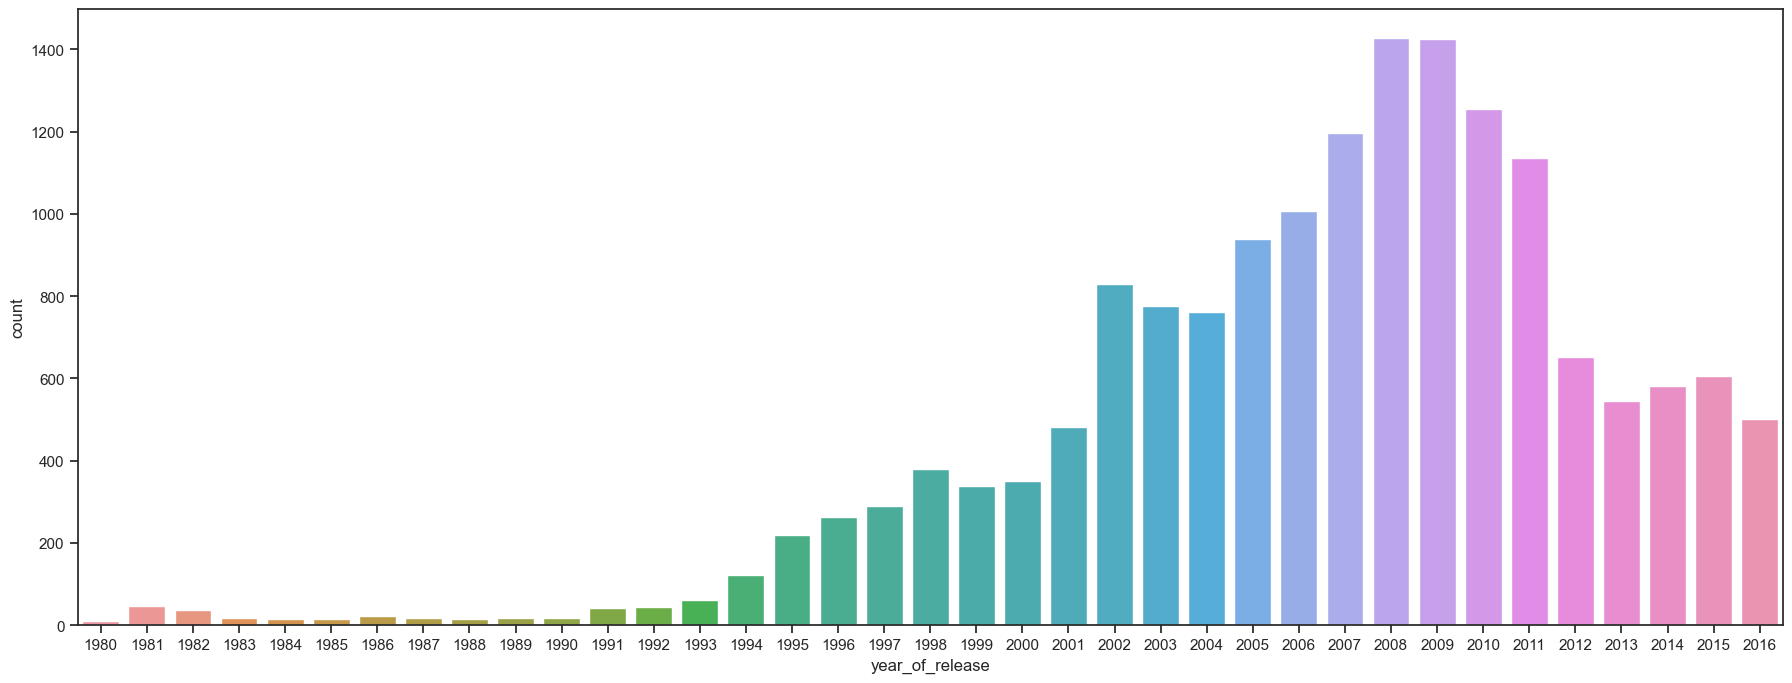

In [36]:
# сводная таблица
timeseries = data_new.pivot_table(index='year_of_release', values='sales_total', aggfunc='count')
timeseries.columns = ['count']

# строим график
f, ax = plt.subplots(figsize=(22, 8))
ax = sns.barplot(x=timeseries.index, y="count", data=timeseries)


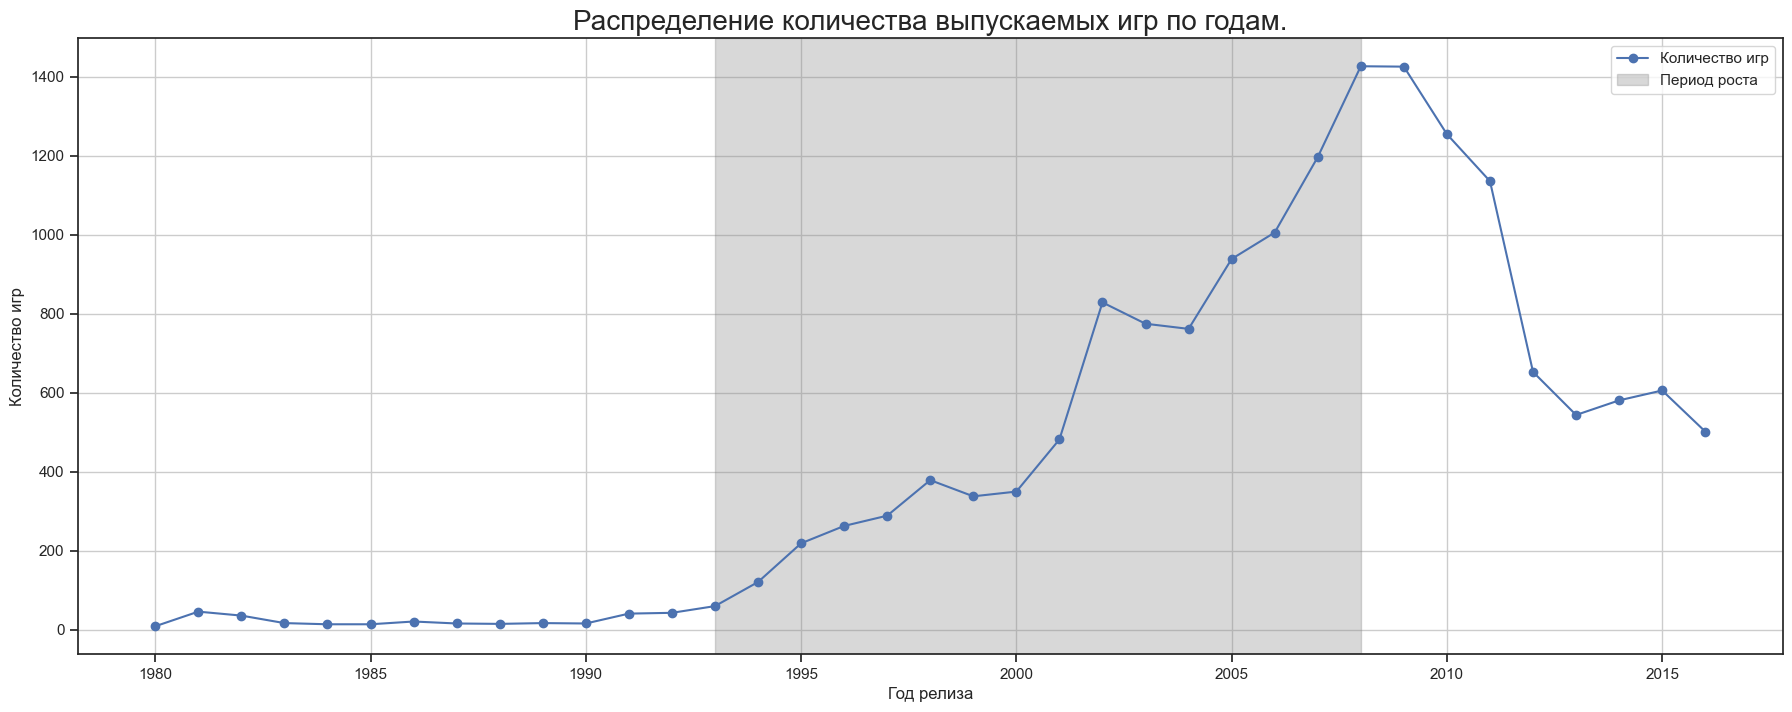

In [37]:
plt.figure(figsize=(22,8))
plt.title('Распределение количества выпускаемых игр по годам.', fontsize=20)
plt.ylabel('Количество игр')
plt.xlabel('Год релиза')
plt.plot(data_new.groupby('year_of_release')['name'].count(), 'o-', label='Количество игр', alpha=1)
plt.axvspan(1993, 2008, color='gray', label='Период роста', alpha=0.3)
plt.grid(True)
plt.legend();

<div class="alert alert-info">     
 </b></font>
    <br /> 
    <font size="3", color = "black">- Из графика видно, что количество игр на игровых приставках и компьютерах начало расти с большой скоростью с 90х годов до 2008 года. 
- В 2008 году начался мировой кризис, который совпал с массовым созданием мобильных приложений и мобильных игр, что привело  к резкому спаду консольных игр.

Далее рассмотрим распределение продаж по платформам. Оценим жизненный цикл платформ.

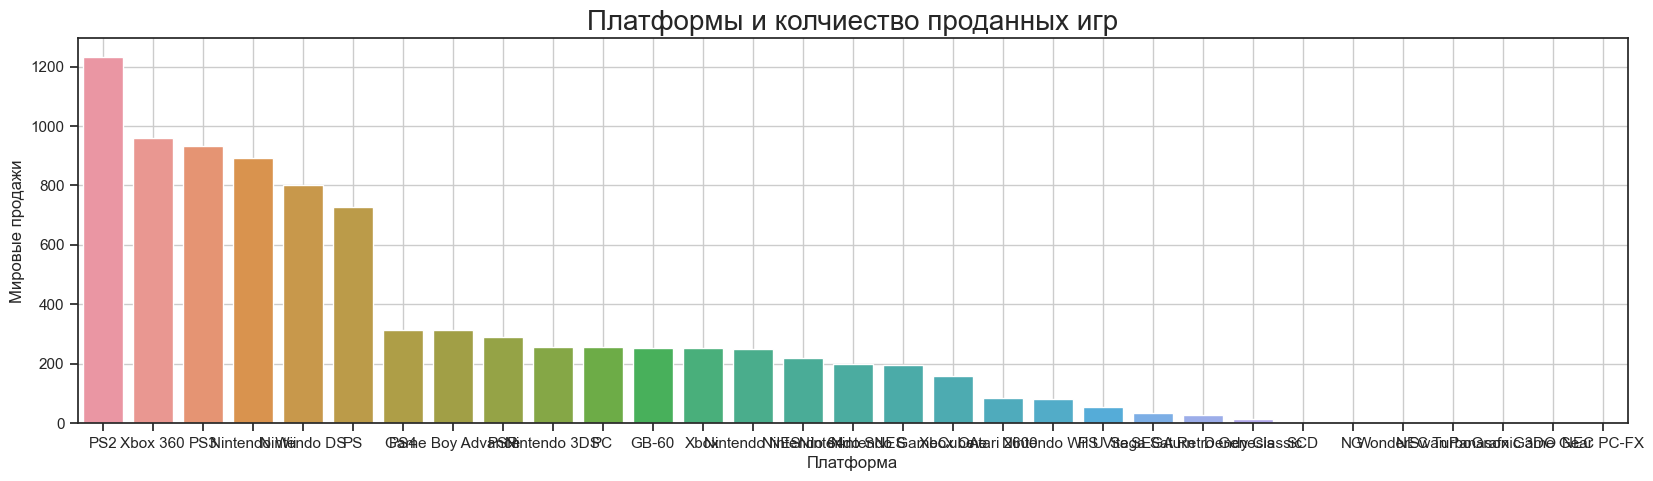

In [38]:
all_platform_and_total_sales = data_new.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False)
plt.figure(figsize=(20, 5))
plt.title('Платформы и колчиество проданных игр', fontsize=20)
sns.barplot(x=all_platform_and_total_sales.index, y=all_platform_and_total_sales['sales_total'])
plt.ylabel('Мировые продажи')
plt.xlabel('Платформа')
plt.grid(True);

<div class="alert alert-info">     
</b></font>
    <br /> 
    <font size="3", color = "black">С наибольшим отрывом от остальных лидирующие позиции занимают 6 платформ.

PS4, XOne не менее популярные платформы, хотя и не попали в список лидеров. Вполне возможно это связано с тем, что консоли с момента выхода не обзавелись большой библиотекой игр на момент составления отчета.

Посмотрим средний цикл жизни платформы, а также, какие платформы были на пике продаж в 2016 году.

<div class="alert alert-info">     
</b></font>
    <br /> 
    <font size="3", color = "black">Попыталась построить графики на примере вот таких https://proglib.io/p/grafiki-v-python-9-vidov-vizualizacii-privlekayushchih-vnimanie-luchshe-chem-gistogramma-2022-09-07 

Код ставится, начинает запускаться и все, дальше не идет. Буду рада, если объясните, почему не запускается

<div class="alert alert-info">     
<b>    <font size="3", color = "black">	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

In [39]:
top_10_platforms = data_new.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).head(10)
top_10_platforms = top_10_platforms.reset_index().rename_axis(None, axis=1)

In [40]:
top_10_platforms

,platform,sales_total
0,PS2,1233.56
1,Xbox 360,961.24
2,PS3,931.34
3,Nintendo Wii,891.18
4,Nintendo DS,802.78
5,PS,727.58
6,PS4,314.14
7,Game Boy Advance,312.88
8,PSP,289.53
9,Nintendo 3DS,257.81


In [41]:
def year_total_sale_for_platform(name, data_new):
    slicee = data_new[(data_new['platform'] == name)]
    total = slicee.pivot_table(index='year_of_release', values='sales_total', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

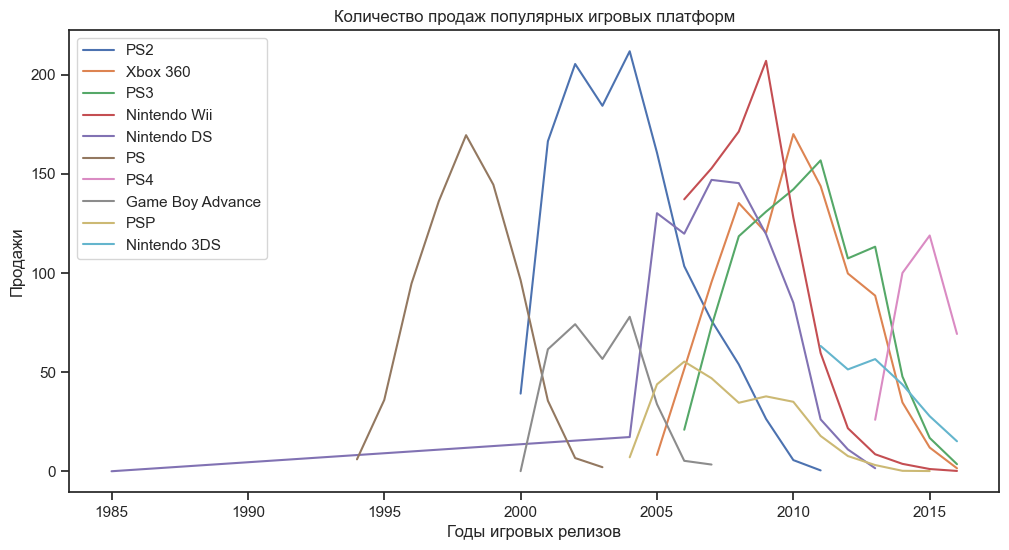

In [42]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_10_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data_new)['sales_total'], label=i)
    plt.legend()

<div class="alert alert-info">     
    <br /> 
    <font size="3", color = "black">За какой характерный срок появляются новые и исчезают старые платформы?

In [43]:
timeseries = data_new.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')
timeseries.fillna(0, inplace=True)
notnull=[]
for platform in timeseries.columns:
    notnull.append(timeseries[platform].ne(0).value_counts().loc[timeseries[platform].ne(0).value_counts().index == True].values[0])
notnull = pd.DataFrame(notnull, columns=['active_years'])
notnull.describe()

,active_years
count,31.00
mean,7.68
std,5.08
min,1.00
25%,4.00
50%,7.00
75%,11.00
max,26.00


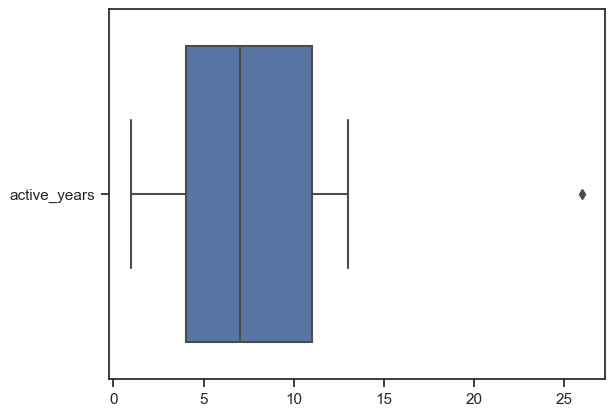

In [44]:
_ = sns.boxplot(data=notnull, orient='h')

<div class="alert alert-info">     
<b>
    <font size="3", color = "black">Средний период жизни одной платформы в период до 2017 года составлял 7,5 лет, то есть это средний период, когда игровая платформа приносит деньги создателям.

- Актуальным периодом будем считать 7 лет, так как это среднее время существования платформы. То есть время с 2009 по 2016 года. Соответственно, я могу на основе этих данных построить прогноз на 2017 год. 

In [45]:
data_act = data_new[(2009 <= data_new['year_of_release'])]

<div class="alert alert-info">     
    <font size="3", color = "black">Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2009 года, создадим топ-10 по платформам и их общим продажам, начиная с 2009 года, по аналогии с таблицей выше.

In [46]:
top_10_2009 = data_act.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).head(10)
top_10_2009 = top_10_2009.reset_index().rename_axis(None, axis=1)

In [47]:
top_10_2009

,platform,sales_total
0,PS3,718.67
1,Xbox 360,670.70
2,Nintendo Wii,429.94
3,PS4,314.14
4,Nintendo 3DS,257.81
5,Nintendo DS,243.29
6,Xbox One,159.32
7,PC,138.87
8,PSP,101.83
9,Nintendo Wii U,82.19


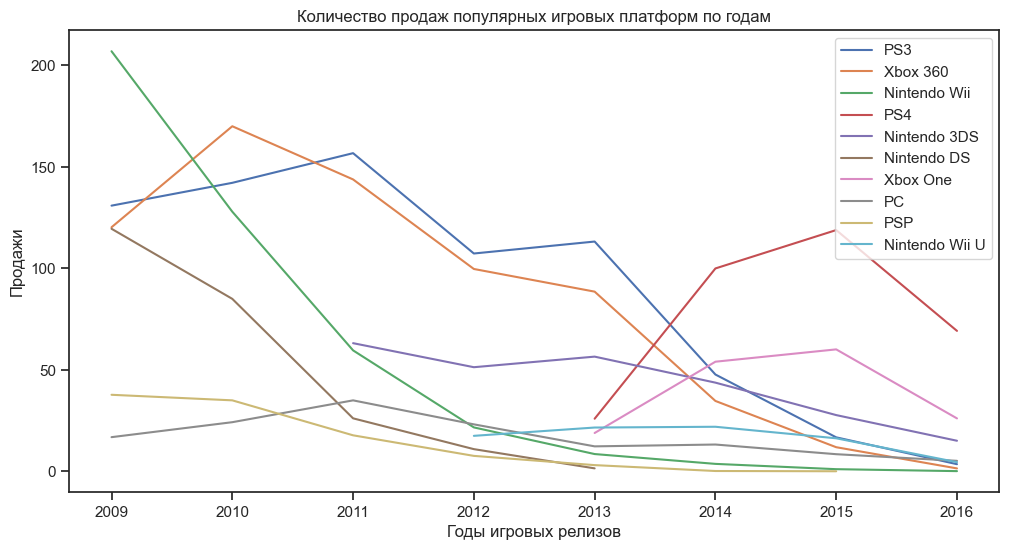

In [48]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ по годам')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_10_2009['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data_act)['sales_total'], label=i);
    plt.legend()

<div class="alert alert-info">     
    <font size="3", color = "black">Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Здесь можно увидеть, что к 2016 году продажи падают у всех игровых платформ, но потенциально прибыльными все еще являются три платформы: PS4, Xbox One, Nintendo 3DS. 

<div class="alert alert-info">     
    <font size="3", color = "black">	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

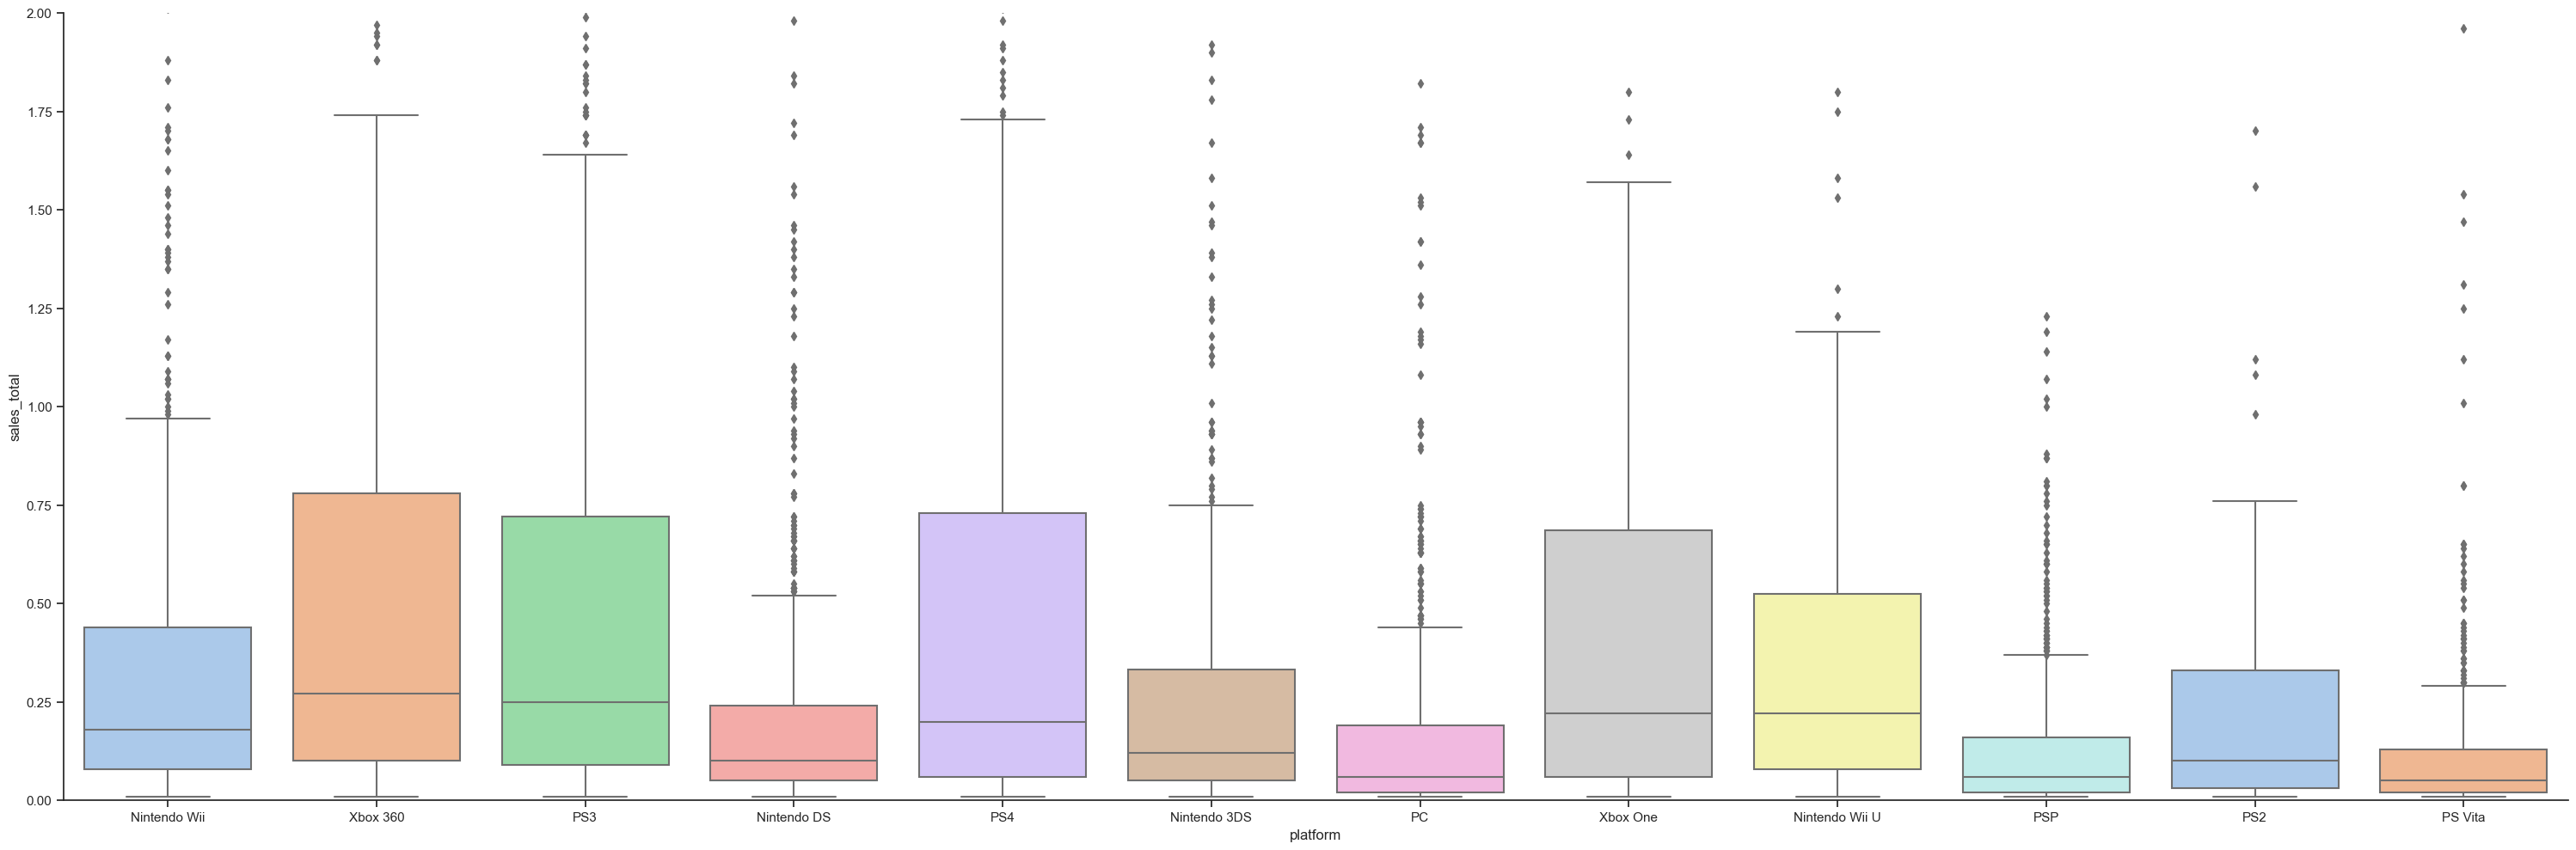

In [49]:
# график за 7 лет
sns.catplot(x="platform", 
            y='sales_total', 
            kind="box", 
            data=data_act, 
            orient='v', 
            height=10, 
            aspect=3,
            palette='pastel')
_ = plt.ylim(0, 2)

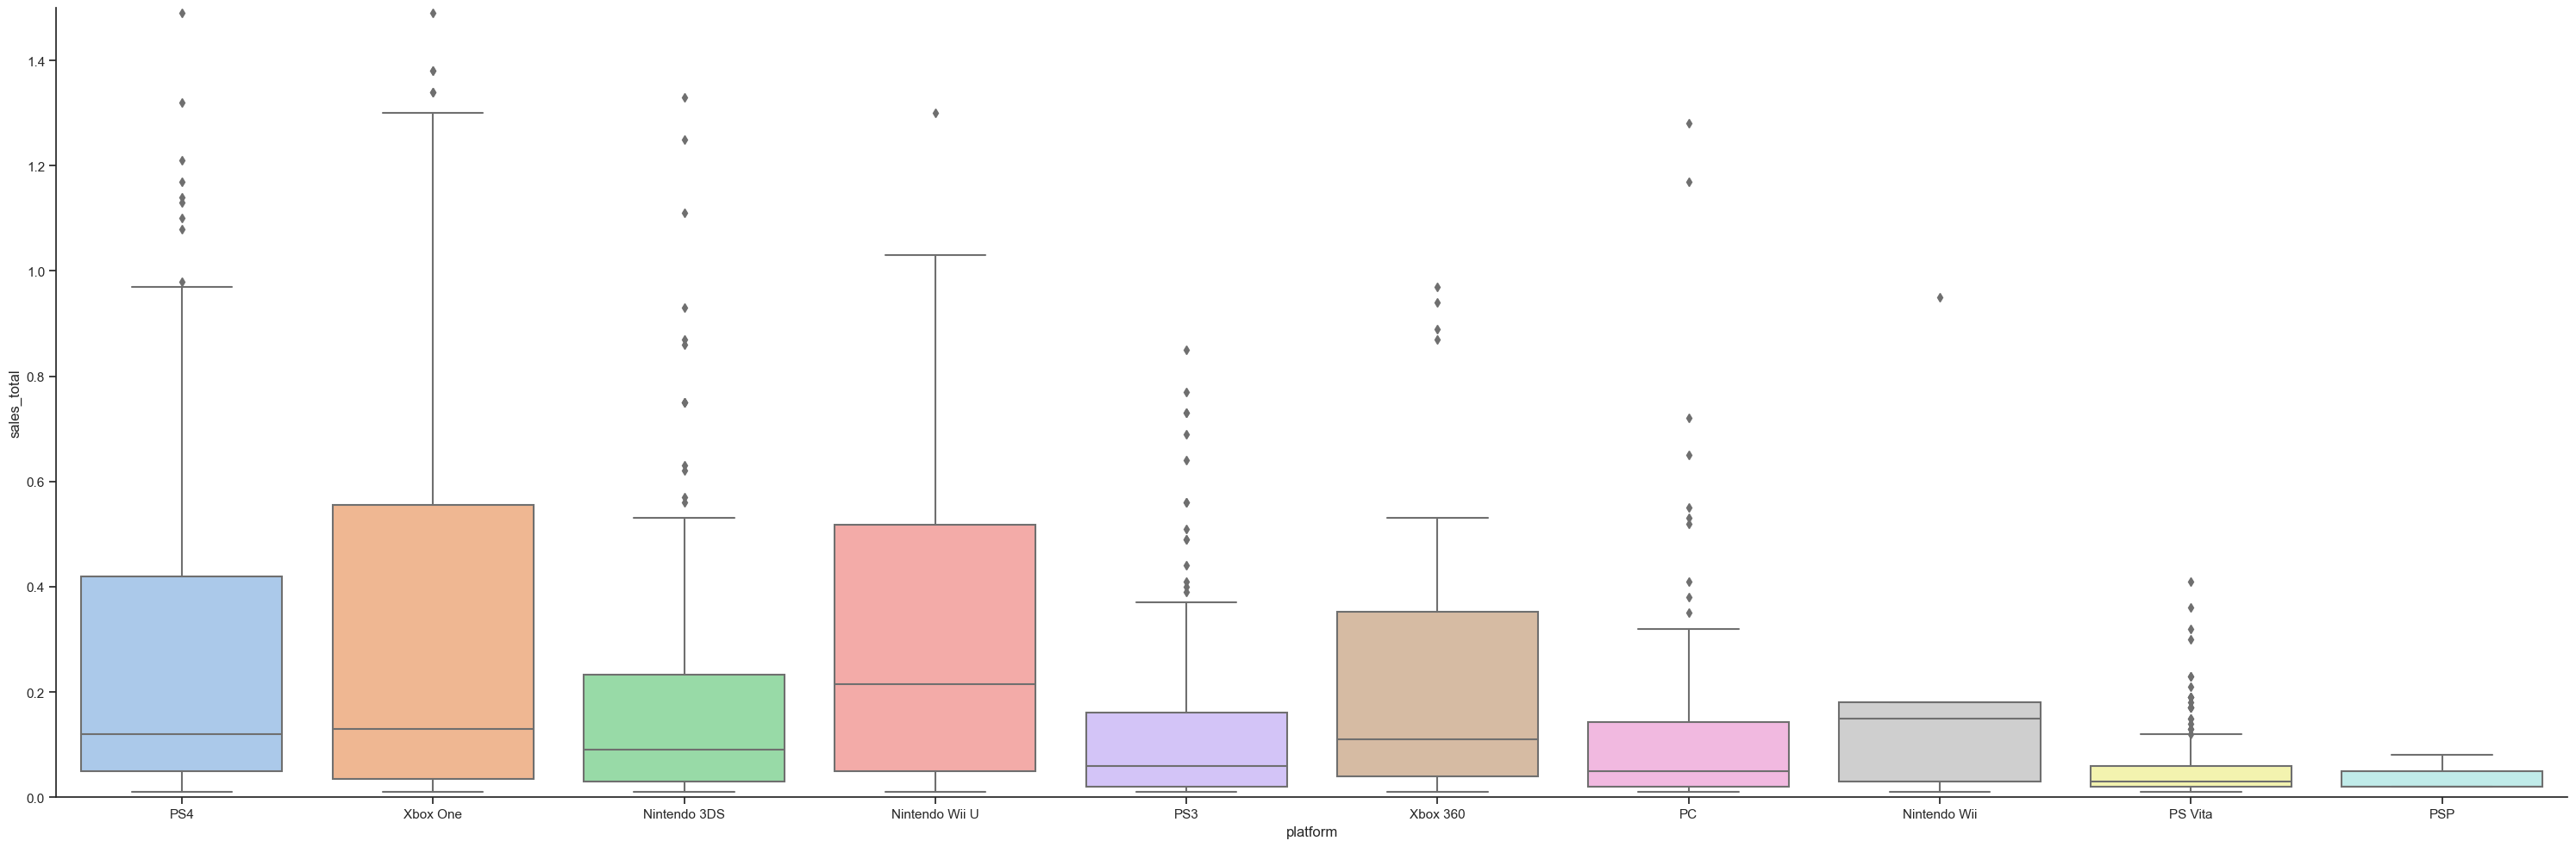

In [50]:
actual_data = data_act.query('year_of_release >= 2015')
# график за 2015 - 2016 годы
sns.catplot(x="platform", 
            y='sales_total', 
            kind="box", 
            data=actual_data, 
            orient='v', 
            height=10, 
            aspect=3,
            palette='pastel')
_ = plt.ylim(0, 1.5)

In [51]:
actual_data.pivot_table(index='platform', values='sales_total', aggfunc='sum').nlargest(10, 'sales_total')

,sales_total
platform,
PS4,188.15
Xbox One,86.29
Nintendo 3DS,42.92
Nintendo Wii U,20.95
PS3,20.42
PC,13.77
Xbox 360,13.48
PS Vita,10.50
Nintendo Wii,1.32


<div class="alert alert-info">     
    <font size="3", color = "black">Разница в основном незначительна. С 1 по 3 квартиль разные платформы демонстрируют похожие продажи. То есть медианные продажи не будут сильно различаться, чего не скажешь о средних. Выбросы в данном случае - это игры-хиты у каждой из платформ.  Также видим, что начинает набирать обороты PC, то есть персональный компьютер.  

<div class="alert alert-info">     
    <font size="3", color = "black">Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посчитаем коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж и построим корреляционную диаграмму.

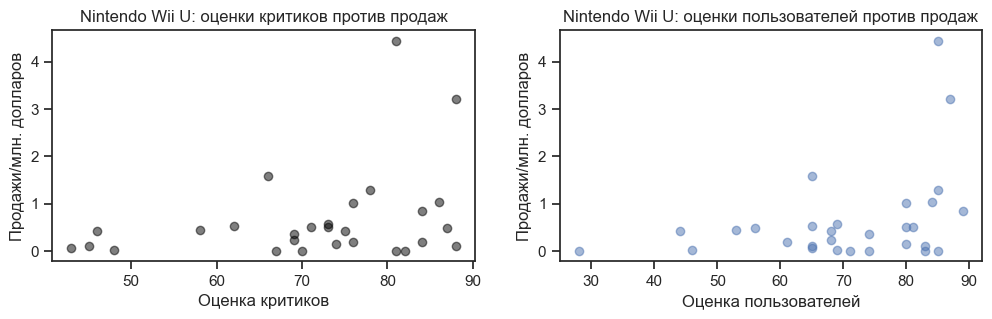

In [52]:
nintendo_wii =  actual_data.query('platform == "Nintendo Wii U"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 3)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=nintendo_wii.critic_score,
            y=nintendo_wii.sales_total,
            alpha=0.5,
            color='black');
ax1.set_title('Nintendo Wii U: оценки критиков против продаж')
ax1.set_xlabel('Оценка критиков')
ax1.set_ylabel('Продажи/млн. долларов')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=nintendo_wii.user_score,
            y=nintendo_wii.sales_total,
            alpha=0.5);
ax2.set_title('Nintendo Wii U: оценки пользователей против продаж')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Продажи/млн. долларов');

In [53]:
nintendo_wii['critic_score'].corr(nintendo_wii['sales_total'])

0.31704571176962204

In [54]:
nintendo_wii['user_score'].corr(nintendo_wii['sales_total'])

0.36351857248094444

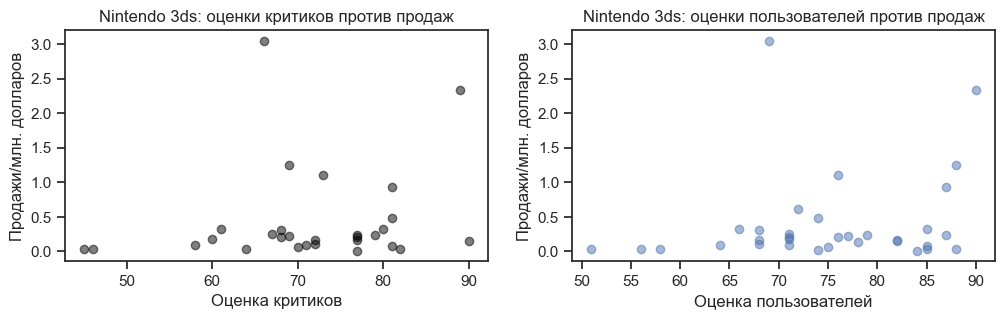

In [55]:
nintendo_3ds = actual_data.query('platform == "Nintendo 3DS"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 3)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=nintendo_3ds.critic_score,
            y=nintendo_3ds.sales_total,
            alpha=0.5,
            color='black');
ax1.set_title('Nintendo 3ds: оценки критиков против продаж')
ax1.set_xlabel('Оценка критиков')
ax1.set_ylabel('Продажи/млн. долларов')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=nintendo_3ds.user_score,
            y=nintendo_3ds.sales_total,
            alpha=0.5);
ax2.set_title('Nintendo 3ds: оценки пользователей против продаж')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Продажи/млн. долларов');

In [56]:
nintendo_3ds['critic_score'].corr(nintendo_3ds['sales_total'])

0.17757455046092865

In [57]:
nintendo_3ds['user_score'].corr(nintendo_3ds['sales_total'])

0.19879627008102976

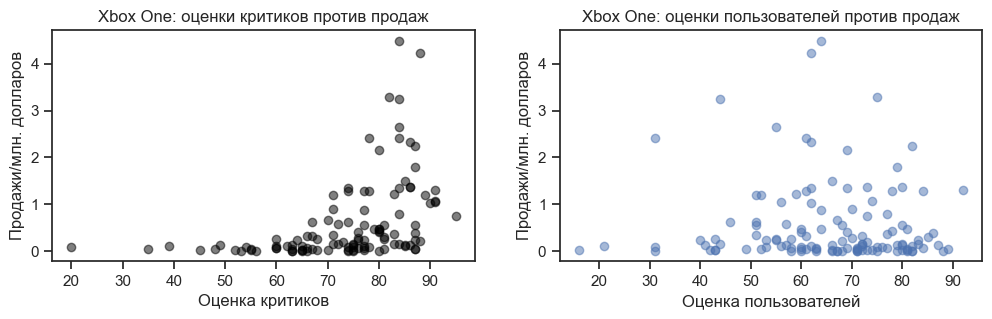

In [58]:
xboxe_one = actual_data.query('platform == "Xbox One"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 3)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=xboxe_one.critic_score,
            y=xboxe_one.sales_total,
            alpha=0.5,
            color='black');
ax1.set_title('Xbox One: оценки критиков против продаж')
ax1.set_xlabel('Оценка критиков')
ax1.set_ylabel('Продажи/млн. долларов')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=xboxe_one.user_score,
            y=xboxe_one.sales_total,
            alpha=0.5);
ax2.set_title('Xbox One: оценки пользователей против продаж')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Продажи/млн. долларов');

In [59]:
xboxe_one['critic_score'].corr(xboxe_one['sales_total'])

0.4308887458213678

In [60]:
xboxe_one['user_score'].corr(xboxe_one['sales_total'])

-0.041467333873662714

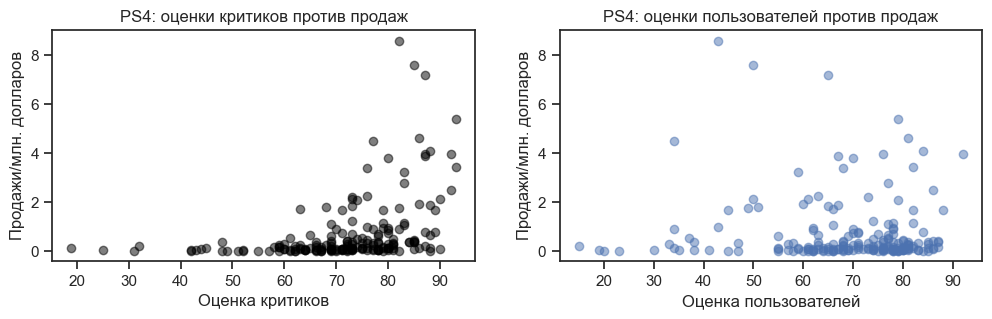

In [61]:
PS4 = actual_data.query('platform == "PS4"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 3)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=PS4.critic_score,
            y=PS4.sales_total,
            alpha=0.5,
            color='black');
ax1.set_title('PS4: оценки критиков против продаж')
ax1.set_xlabel('Оценка критиков')
ax1.set_ylabel('Продажи/млн. долларов')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=PS4.user_score,
            y=PS4.sales_total,
            alpha=0.5);
ax2.set_title('PS4: оценки пользователей против продаж')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Продажи/млн. долларов');

In [62]:
PS4['critic_score'].corr(PS4['sales_total'])

0.3928485555130599

In [63]:
PS4['user_score'].corr(PS4['sales_total'])

-0.05973845712638205

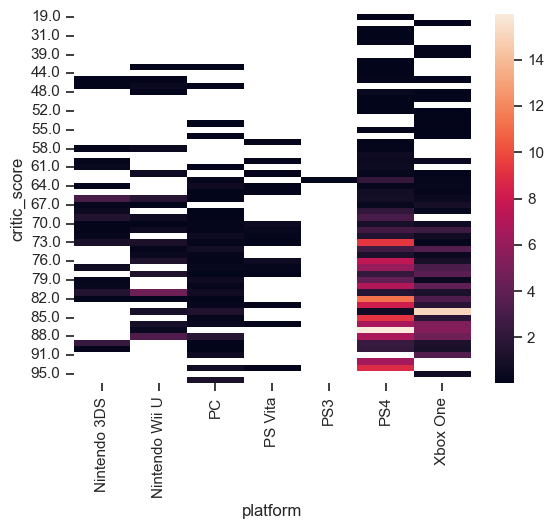

<Figure size 1000x700 with 0 Axes>

In [64]:
sns.heatmap(actual_data.pivot_table(index='critic_score', columns='platform', values='sales_total', aggfunc='sum'));
plt.figure(figsize=(10,7));

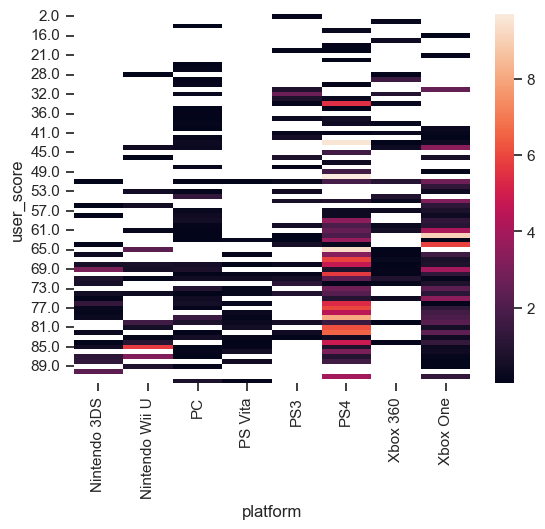

<Figure size 1000x700 with 0 Axes>

In [65]:
sns.heatmap(actual_data.pivot_table(index='user_score', columns='platform', values='sales_total', aggfunc='sum'));
plt.figure(figsize=(10,7));

<div class="alert alert-info">     
    <font size="3", color = "black">Если смотреть коэффициенты корреляции, то видно, что оценка пользователей влияет на продажи примернов два раза меньше, чем оценка критиков, а в некоторых случаях влияет слабо отрицательно. При этом, и в том, и в другом случае корреляция достаточно слабая. 

Это значит, что уровень продаж практически не зависел 10 лет назад ни от оценок пользователей, ни от оценок критиков.

На тепловых картах видны взаимосвязи у игр PS4, Xbox One и Nintendo Wii U, которые возглавляли тройку лидеров на тот момент. 

Вывод: чем выше продажи платформы, тем больше наблюдается взаимозависимость между продажами и оценками критиков. При этом оценка пользователей практически никогда не воияет на сумму продаж. Значит, обзоры игровых платформ влияют на желание обывателей приобрести тот или иной девайс.

<div class="alert alert-info">     
    <font size="3", color = "black">Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Соответственно, надо посмотреть, какие жанры у нас присутствуют и сравнить показатели по разным жанрам и сумме продаж.

<AxesSubplot:xlabel='genre', ylabel='platform'>

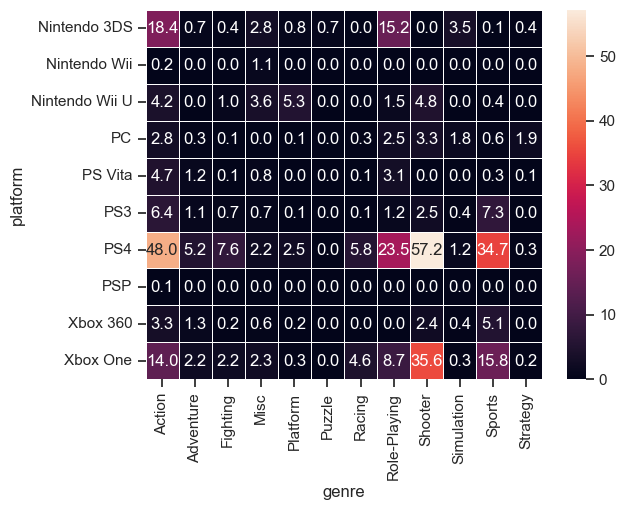

In [66]:
platform_genre_sales = actual_data.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='sales_total', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

<div class="alert alert-info">     
    <font size="3", color = "black">Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

Выделяются: 

Action - PS4, Nintendo 3DS, Xbox One;

Shooter - PS4, Xbox One;

Sports - PS4, Xbox One;

Role-Playing - PS4, Nintendo 3DS.

Посмотрим, какой процент занимает выше указанные жанры у данных платформ и сколько денег приносят эти жанры по этим платформам и остальные жанры во взаимосвязи с другими платформами.

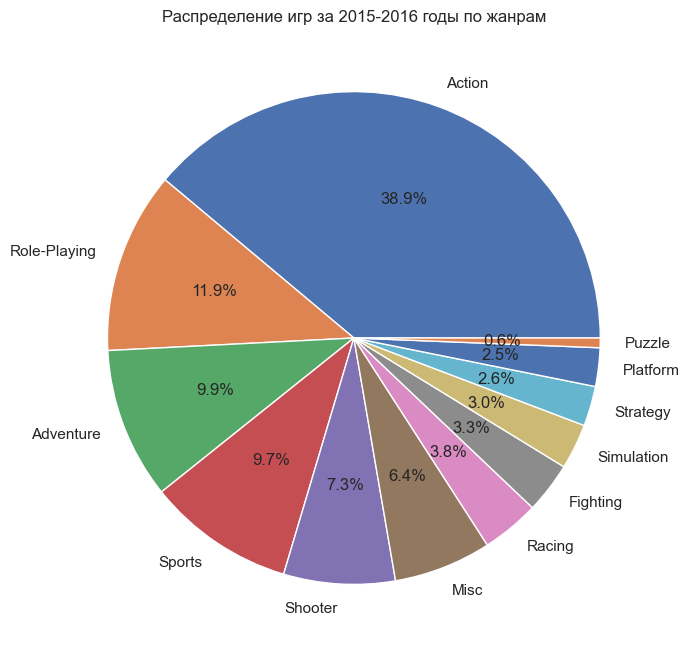

In [67]:
actual_data['genre'].value_counts().plot(kind='pie', 
                                           y='genre', 
                                           figsize=(8,8), 
                                           autopct='%1.1f%%', 
                                           ylabel=' ',
                                           title = 'Распределение игр за 2015-2016 годы по жанрам'
);

<div class="alert alert-info">     
    <font size="3", color = "black">Интересно посмотреть, какие жанры у самых продаваемых игр за все время:

In [68]:
actual_data.pivot_table(index=['name', 'platform', 'genre'], values='sales_total', aggfunc='sum').nlargest(10, 'sales_total')

,,,sales_total
name,platform,genre,
Call of Duty: Black Ops 3,PS4,Shooter,14.63
FIFA 16,PS4,Sports,8.58
Star Wars Battlefront (2015),PS4,Shooter,7.98
FIFA 17,PS4,Sports,7.60
Call of Duty: Black Ops 3,Xbox One,Shooter,7.39
Fallout 4,PS4,Role-Playing,7.17
Pokemon Sun/Moon,Nintendo 3DS,Role-Playing,7.14
Uncharted 4: A Thief's End,PS4,Shooter,5.39
Uncharted: The Nathan Drake Collection,PS4,Action,4.62


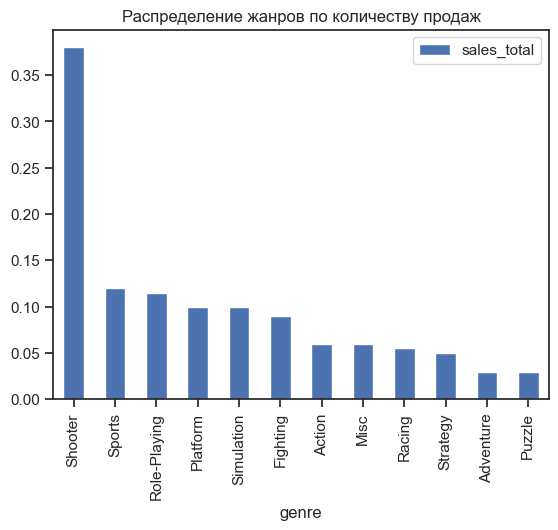

In [69]:
genres = actual_data.groupby('genre').agg({'sales_total':'median'}).reset_index().sort_values(by='sales_total',ascending=False).plot(
                                    kind='bar',
                                    x='genre',
                                    y='sales_total',
                                    rot=0,
                                    title='Распределение жанров по количеству продаж'
                                    );
plt.xticks(rotation=90);

<div class="alert alert-info">     
    <font size="3", color = "black">Не удивительно, что самая продаваемая игра в актуальный период из жанра Shooter, как и еще 4 игры, ведь этот жанр с большим отрывом лидировал по количеству продаж. Sports	на втором месте в рейтинге жанров и в рейтинге игр. Третье место в списке жанров и с двумя играми в десятке самых продаваемых занимает Role-Playing. 

<div class="alert alert-info">     
    <font size="3", color = "black">Вывод по исследовательскому анализу данных:

Если смотреть на общий объем проданных в мире игровых приставок, в глаза бросается значительный рост с 1994 года и падение после 2008 года. Это связано со снижением популярности портативных консолей Sony PSP и Nintendo DS и с ростом популярности смартфонов. С позиции отдельных моделей продажи Sony PlayStation были достаточно стабильными. Продажи Nintendo сильно падали вместе с падением популярности DS и Wii. Продажи Xbox падали примерно с 2010 года.

Объем продаж Sony PlayStation с 2005 по 2016 год находился на уровне 15—20 млн шт., что было связано с ожиданием выхода новой модели (PlayStation 5). 

В целом аналитики ожидают, что игровые приставки будут в ближайшие годы сохранять свою долю на рынке и расти вместе с рынком видеоигр.

Средняя жизнь игровой платформы составляет 7 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.

У всех платформ наблюдается небольшая взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей

# Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
-	Самые популярные платформы (топ-5). Опишите различия в долях продаж.
-	Самые популярные жанры (топ-5). Поясните разницу.
-	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [70]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def for_pivot(row, title):
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre']),axes.flatten()[:2]):
        ppivot = data_new.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head()
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за 2015 - 2016 годы
def for_pivot_2016(row, title):
    temp = actual_data
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre']), axes.flatten()[:2]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

## Посмотрим сначала на пользователя Северной Америки

       platform  na_sales
0      Xbox 360    595.74
1           PS2    572.92
2  Nintendo Wii    486.87
3           PS3    390.13
4   Nintendo DS    380.31



      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57





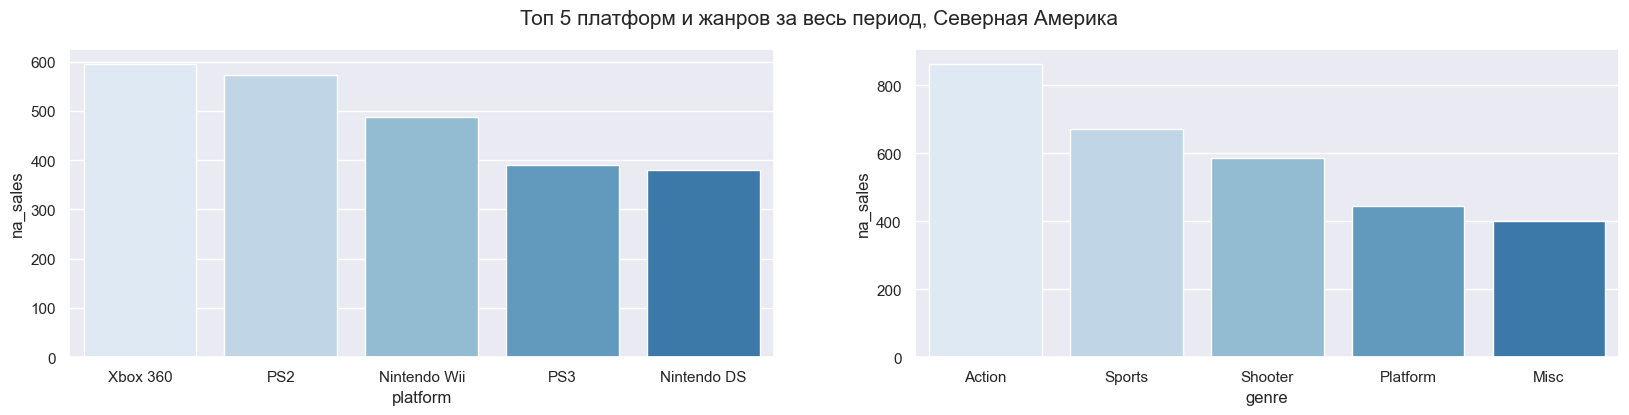

In [71]:
for_pivot('na_sales','Топ 5 платформ и жанров за весь период, Северная Америка')

         platform  na_sales
0             PS4     63.86
1        Xbox One     50.30
2    Nintendo 3DS     10.31
3  Nintendo Wii U      8.86
4        Xbox 360      8.05



          genre  na_sales
0       Shooter     48.18
1        Action     33.68
2        Sports     26.31
3  Role-Playing     19.82
4          Misc      5.58





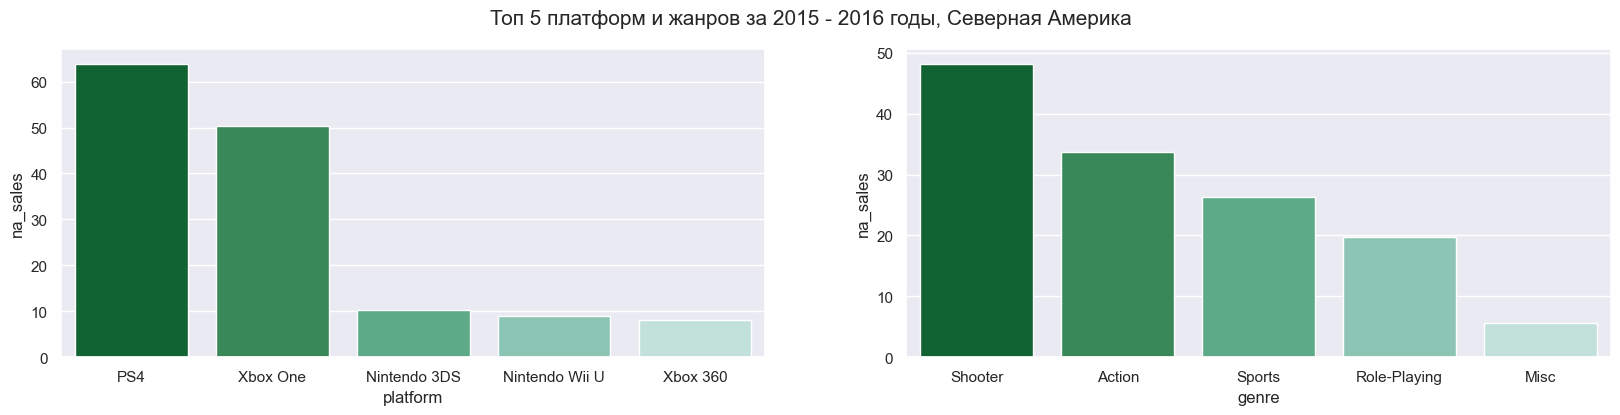

In [72]:
for_pivot_2016('na_sales','Топ 5 платформ и жанров за 2015 - 2016 годы, Северная Америка')

## Портрет пользователя European Union

       platform  eu_sales
0           PS2    332.63
1           PS3    327.21
2      Xbox 360    268.32
3  Nintendo Wii    258.32
4            PS    212.39



     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60





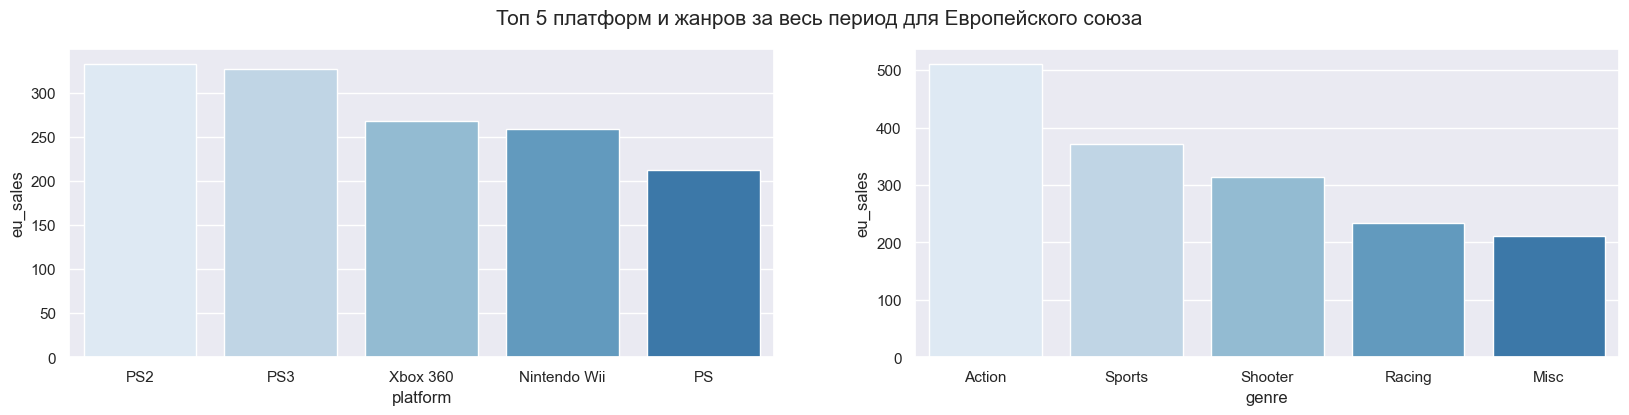

In [73]:
for_pivot('eu_sales','Топ 5 платформ и жанров за весь период для Европейского союза')

       platform  eu_sales
0           PS4     83.54
1      Xbox One     28.10
2            PC      9.10
3  Nintendo 3DS      7.39
4           PS3      7.30



          genre  eu_sales
0       Shooter     40.28
1        Action     34.82
2        Sports     27.82
3  Role-Playing     17.21
4        Racing      6.52





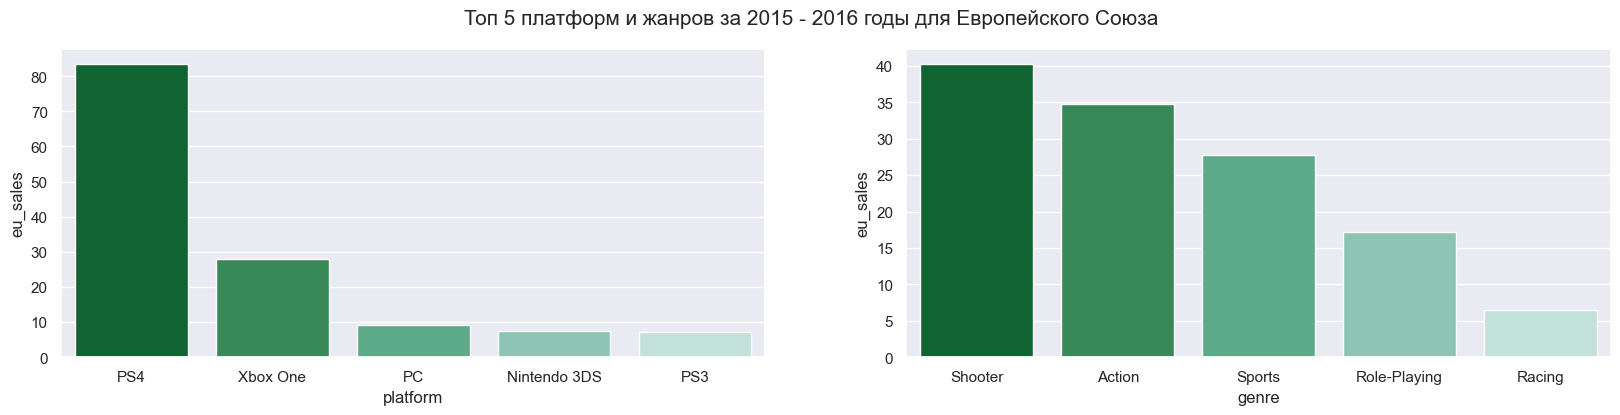

In [74]:
for_pivot_2016('eu_sales','Топ 5 платформ и жанров за 2015 - 2016 годы для Европейского Союза')

## Портрет пользователя Japanese

        platform  jp_sales
0    Nintendo DS    175.02
1             PS    139.78
2            PS2    137.54
3  Nintendo SNES    116.55
4   Nintendo 3DS    100.62



          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02





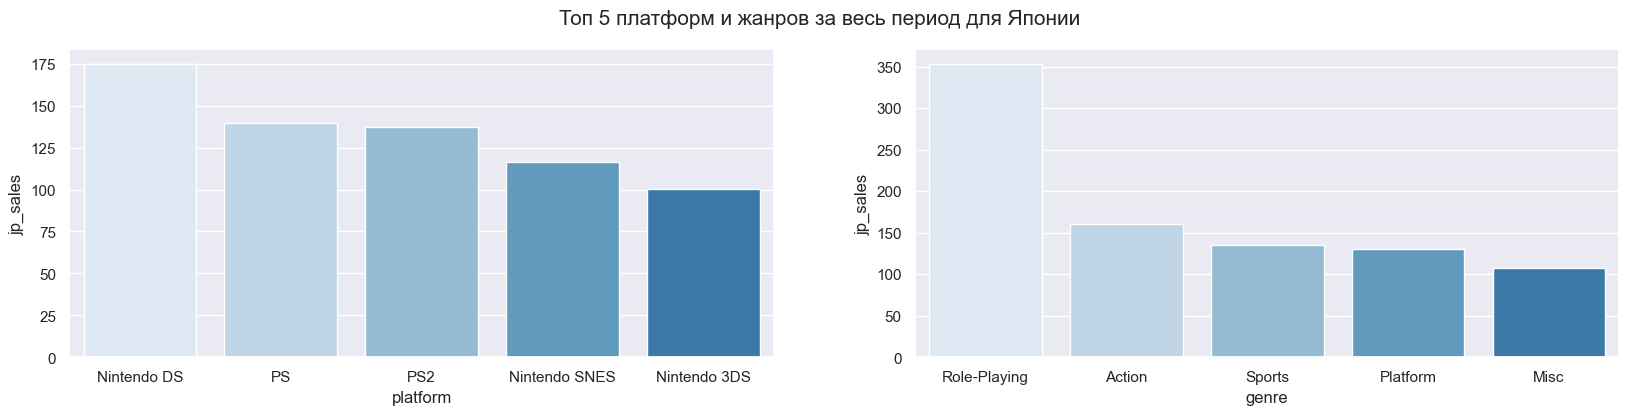

In [75]:
for_pivot('jp_sales','Топ 5 платформ и жанров за весь период для Японии')

         platform  jp_sales
0    Nintendo 3DS     23.55
1             PS4     12.05
2         PS Vita      8.41
3             PS3      4.97
4  Nintendo Wii U      4.12



          genre  jp_sales
0        Action     23.05
1  Role-Playing     13.41
2       Shooter      3.79
3          Misc      3.19
4     Adventure      2.22





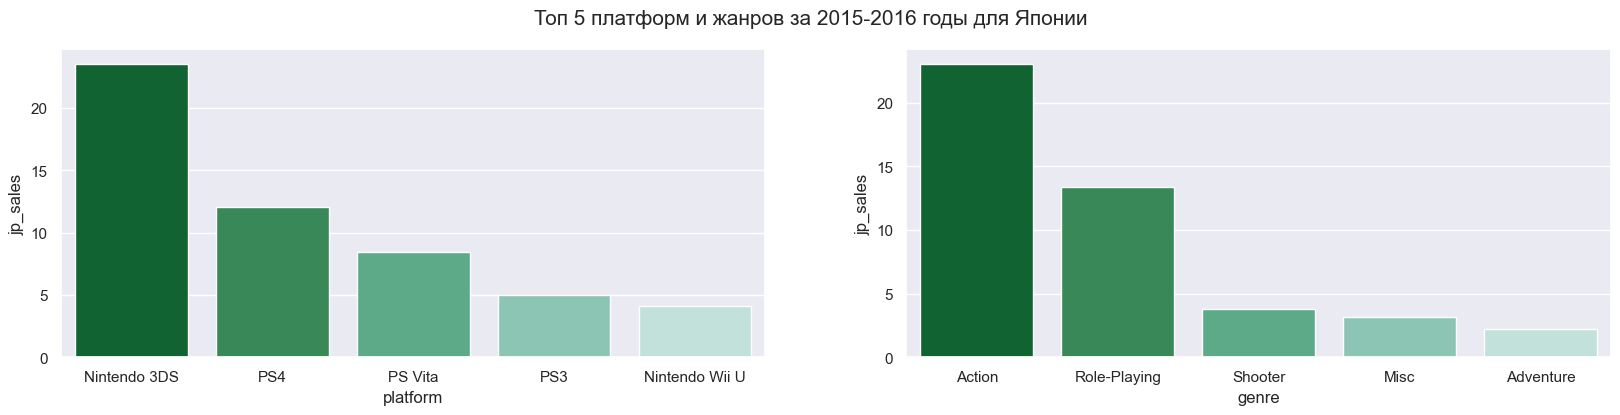

In [76]:
for_pivot_2016('jp_sales','Топ 5 платформ и жанров за 2015-2016 годы для Японии')

<div class="alert alert-info">     
    <font size="3", color = "black">Вывод:
Азиатский рынок наиоблее обособлен от остальных.

Европейский и американский во многом схожи.

Самой популярной линейкой-платформ в США и Европе в 2015 - 2016 годах являлась - PS4

Самой популярной линейкой-платформ в Японии является - Nintendo 3DS

А в платформе XBOX азиатские геймеры видимо вообще не заинтересованы.

Самым популярным жанром в Европе и США является шутер - "стрелялки", тогда как в Японии больше любят жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. 

## Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

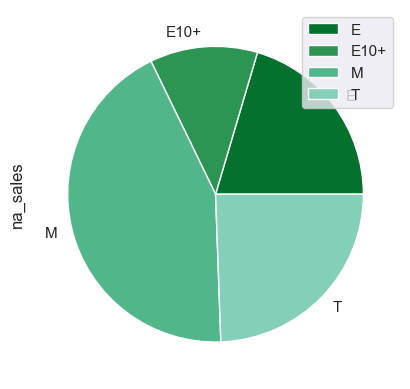

In [77]:
#  Рейтинг от организации ESRB в Северной Америке в 2015-2016 годах
actual_data.groupby(['rating']).sum().plot(kind='pie', y='na_sales');

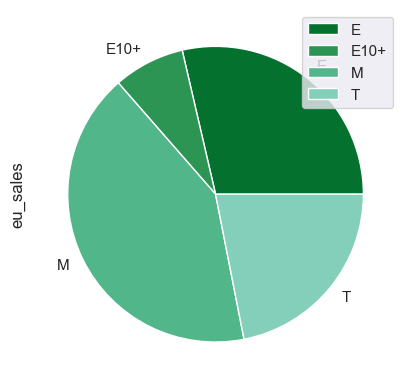

In [78]:
#  Рейтинг от организации ESRB в Европе в 2015-2016 годах
actual_data.groupby(['rating']).sum().plot(kind='pie', y='eu_sales');

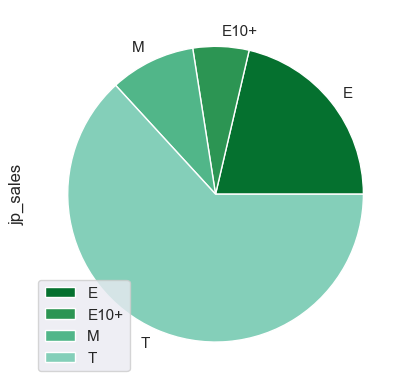

In [79]:
#  Рейтинг от организации ESRB в Японии в 2015-2016 годах
actual_data.groupby(['rating']).sum().plot(kind='pie', y='jp_sales');

<div class="alert alert-info">     
    <font size="3", color = "black">«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику - наиболее популярный жанр в Штатах и Европе.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики - более всего игры данного жанра ценятся в Японии.

<div class="alert alert-info">     
    <font size="3", color = "black">Общий вывод по проекту:
    Общий вывод

Перед анализом данных, я подготовила данные, привела к правильным форматам столбцы, привела к нижнему регистру таблицы и сами названия колонок и привела к правильным типам данных необходимые столбцы.
Определила, что аббревиатура TBD значит to be determined, то есть данные были нарочно не заполнены. Поэтому заменила tbd на nan для проведения дальнейшего анализа
Проведя анализ, я выявила, что количество игр на игровых приставках и компьютерах начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.
За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
Также я выявила, что средняя продолжительность жизни игровой приставки составляет порядка 7,5 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли.
Исходя из анализа я увидела, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус и цвет.
Проведя анализ оценок пользователей и критиков, я выявила, что оценки критиков и пользователей слабо или умеренно взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
Так же определила, что самый популярный жанр за все время это Экшн. На последнем месте стратегии (а мне они нравятся больше всего).

После я составила портрет пользователя каждого региона.
Выяснила, что в Северной Америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".
В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. 

Исходя из всех данных предполагаем, что лучше всего в 2017 году должны были продаваться игры для таких приставок как Sony Playstation 4
Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.